In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
from matplotlib.patches import Patch
import seaborn as sns
import matplotlib as mpl

In [2]:
annot_table = pd.read_table("../data/transcriptomics_data/pannzer/GCF_002163715/anno.out")
go_table = pd.read_table("../data/transcriptomics_data/pannzer/GCF_002163715/GO.out")
go_table = go_table[go_table["ARGOT_PPV"] >= 0.6]
annot_table.head()

,qpid,type,score,PPV,id,desc
0,ALENMEJF_00001,original_DE,bac,n.d.,0.9210526315789473,Transcriptional activator protein ExaE
1,ALENMEJF_00001,qseq,n.d.,n.d.,n.d.,MKILVIDDHALVREGLHQVLKGLDEDVTVLQAGTCAQAFDQAADHP...
2,ALENMEJF_00001,DE,1.2534924630431064,0.7482473324371858,0.9210526315789473,Transcriptional activator protein ExaE
3,ALENMEJF_00001,DE,0.6157766470124837,0.25783392450693676,0.6666666666666667,Response regulatory domain-containing protein
4,ALENMEJF_00001,BP_ARGOT,5.2314301945507395,0.6368060855343078,0000160,phosphorelay signal transduction system


In [3]:
transporter = annot_table[(annot_table["desc"].str.contains("transport"))]
len(transporter.qpid.unique())

681

In [4]:
go_transporter = go_table[go_table["qpid"].isin(transporter.qpid.unique())]
go_transporter.head()

,qpid,ontology,goid,desc,ARGOT_score,ARGOT_PPV,ARGOT_rank,goclasscount
11,ALENMEJF_00002,MF,9678,diphosphate hydrolysis-driven proton transmemb...,12.144822,0.810714,1,100
12,ALENMEJF_00002,BP,1902600,proton transmembrane transport,4.766659,0.621711,1,100
14,ALENMEJF_00002,MF,4427,inorganic diphosphate phosphatase activity,10.799034,0.781855,2,100
15,ALENMEJF_00002,BP,98662,inorganic cation transmembrane transport,4.311208,0.606185,2,100
17,ALENMEJF_00002,MF,287,magnesium ion binding,5.668630,0.650405,3,100


In [5]:
go_transporter_filtered = go_transporter[(go_transporter["desc"].str.contains("transport")) ]

#amino_acid_transporter = go_transporter_filtered
amino_acid_transporter = go_transporter_filtered[(go_transporter_filtered["goid"] == 6865) | (go_transporter_filtered["desc"].str.contains("amino"))]

In [6]:
len(go_transporter_filtered.qpid.unique())

343

In [7]:
genes = ["AEP_" + x.split("_")[-1] for x in amino_acid_transporter.qpid.unique()]

In [8]:
len(genes)

52

In [9]:
#deseq_table_rsem = pd.read_csv("../data/transcriptomics_data/hydra_mono_culture_kiel_vs_liquid_mono_culture_kiel_just_mono.csv")
#deseq_table_rsem = deseq_table_rsem[deseq_table_rsem["padj"] <= 0.05]

deseq_table_bowtie = pd.read_csv("../data/transcriptomics_data/hydra_vs_liquid_mouth_opening_paper.csv", sep=";")
deseq_table_bowtie["log2FoldChange"] = deseq_table_bowtie["log2FoldChange"].apply(lambda x: float(x.replace(",",".")))
deseq_table_bowtie["padj"] = deseq_table_bowtie["padj"].apply(lambda x: float(x.replace(",",".")))

deseq_table_bowtie = deseq_table_bowtie[deseq_table_bowtie["padj"] <= 0.05]

translation_table = pd.read_csv("../data/transcriptomics_data/translation_table_corrected.csv", sep="\t")
deseq_table_bowtie = deseq_table_bowtie.rename(columns={"Unnamed: 0":"locus_tag"})
deseq_table_bowtie = deseq_table_bowtie.merge(translation_table, on="locus_tag")
deseq_table_bowtie = deseq_table_bowtie.rename(columns={"old_locus_tag_x":"gene_id"})


In [10]:
#deseq_table_rsem["gene_id"] = deseq_table_rsem["Unnamed: 0"].apply(lambda x: x.split(":")[-1])
#deseq_table_rsem.head()

In [11]:
#sig_genes = deseq_table_rsem[deseq_table_rsem["gene_id"].isin(genes)].sort_values(by="log2FoldChange")
sig_genes_bowtie = deseq_table_bowtie[deseq_table_bowtie["gene_id"].isin(genes)].sort_values(by="log2FoldChange")

In [12]:
sig_genes_bowtie[["gene_id","log2FoldChange","padj"]]

,gene_id,log2FoldChange,padj
2332,AEP_03751,-2.435742,1.260000e-30
2279,AEP_01235,-2.158674,1.250000e-13
2012,AEP_03753,-1.432135,4.030000e-08
1672,AEP_02180,-0.984957,1.220960e-04
1289,AEP_00269,-0.904802,3.822205e-03
1293,AEP_00267,-0.902659,6.048442e-03
1533,AEP_01233,-0.815838,1.754185e-02
1507,AEP_03752,-0.776259,2.380000e-05
1446,AEP_03754,-0.713039,2.192340e-04
1272,AEP_03049,0.482346,3.161460e-02


In [13]:
amino_acid_transporter[amino_acid_transporter["desc"].str.contains("sulfur")]

,qpid,ontology,goid,desc,ARGOT_score,ARGOT_PPV,ARGOT_rank,goclasscount
38287,ALENMEJF_02016,BP,101,sulfur amino acid transport,5.44255,0.643441,6,21


In [14]:
amino_acid_transporter[amino_acid_transporter["qpid"] == "ALENMEJF_02016"]

,qpid,ontology,goid,desc,ARGOT_score,ARGOT_PPV,ARGOT_rank,goclasscount
38275,ALENMEJF_02016,BP,6865,amino acid transport,6.831813,0.684220,1,47
38287,ALENMEJF_02016,BP,101,sulfur amino acid transport,5.442550,0.643441,6,21
38289,ALENMEJF_02016,BP,15804,neutral amino acid transport,4.775266,0.621997,8,21


In [15]:
def get_description(x):
    gene = "ALENMEJF_" + x.split("_")[-1]
    res = amino_acid_transporter[amino_acid_transporter.qpid == gene].sort_values(by="ARGOT_PPV", ascending=False).iloc[:,:]["desc"].values
    if len(res) > 1:
        for desc in res:
            if desc != "amino acid transport":
                
                if desc == "branched-chain amino acid transmembrane transporter activity":
                    desc = "branched-chain amino acid transmembrane"
                
                desc = desc.replace("amino acid", "AA")
                desc = desc.replace("transporter activity", "transport")
                
                
                return desc
    else:
        desc = res[0]
        desc = desc.replace("amino acid", "AA")
        desc = desc.replace("transporter activity", "transport")
    return desc

/tmp/ipykernel_47/2657903021.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, fontsize=16)


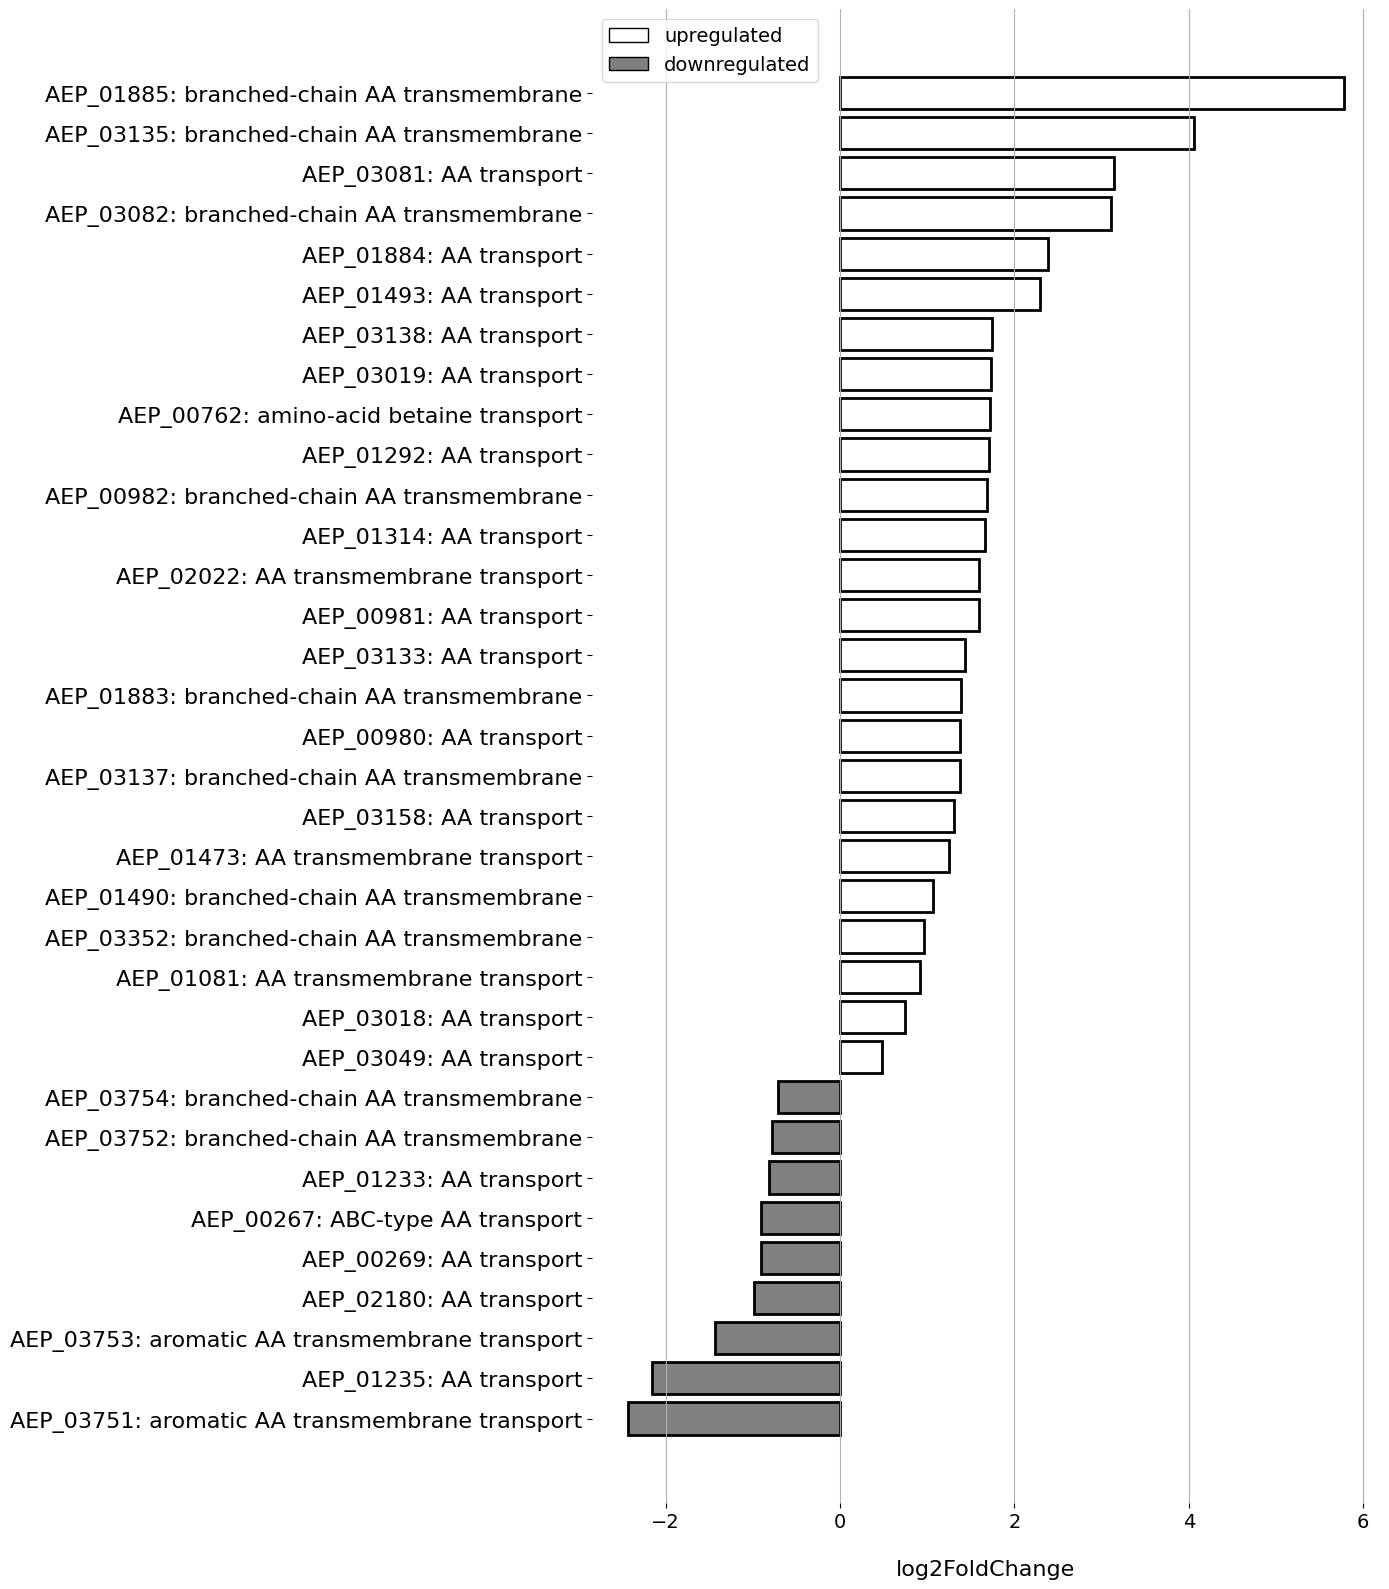

In [16]:
sig_genes = sig_genes_bowtie
fig, ax = plt.subplots(figsize=(14,16))

yticklabels = [gene+": "+get_description(gene) for gene in sig_genes.gene_id]
bar_width = sig_genes.log2FoldChange

colors = []
for log2 in sig_genes.log2FoldChange:
    if log2 < 0:
        colors.append("grey")
    else:
        colors.append("white")

bars = ax.barh(yticklabels, bar_width, color=colors, edgecolor="black", label="significant genes", lw=2)
ax.set_yticklabels(yticklabels, fontsize=16)

#sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('adjusted p-values', labelpad=15, loc='center')
ax.set_xlabel('log2FoldChange', fontsize=16, labelpad=20)
ax.tick_params(axis='x', labelsize=14)
#ax.set_title(, fontsize=15, pad=20)

#plt.xlim(-3.5, 6)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis="x")

legend_handles = [Patch(facecolor="white", edgecolor="black", label='upregulated'),
          Patch(facecolor="grey", edgecolor="black", label='downregulated')]
ax.legend(handles=legend_handles, fontsize=14)

plt.tight_layout()
#plt.savefig("../results/figures/transcriptomics/aa_transporter_upregulated_on_host.svg")

In [17]:
kegg_ids = pd.read_table("../data/transcriptomics_data/curvibacter_wps_to_kegg.txt")
translation_table = pd.read_csv("../data/transcriptomics_data/translation_table_corrected.csv", sep="\t")
translation_table.head()

,protein_id,old_locus_tag,locus_tag
0,WP_087493495.1,AEP_00001,AEP_RS00005
1,WP_087493496.1,AEP_00002,AEP_RS00010
2,WP_087493497.1,AEP_00003,AEP_RS00015
3,WP_087493498.1,AEP_00004,AEP_RS00020
4,WP_087493499.1,AEP_00005,AEP_RS00025


In [18]:
methionine_synthesis_kegg_ids = ["K00928","K00133","K00003","K00641","K10764","K01740","K00297","K00548","K00549"]
sulfur_uptake = ["K02046","K02047","K02048","K02045","K23163","K00956","K00957","K00860","K00390"]

secretion_system2 = ["K02453","K02452","K02455","K02457","K02458","K02459","K02460","K02461","K02462","K02454"]
sec_srp = ["K03072","K03074","K12257","K03073","K03075","K03076","K03210","K03217","K03070","K03110","K03071","K03106"]
secretion_system1 = ["K12340","K11003","K11004"]
tat = ["K03116","K03117","K03118"]

In [19]:
meth_kegg = kegg_ids[kegg_ids.ko.isin(methionine_synthesis_kegg_ids)]
meth_kegg

,protein_id,ko
145,WP_087493643.1,K00928
629,WP_087494180.1,K00003
1050,WP_087494645.1,K00549
1111,WP_087494706.1,K10764
1871,WP_087495570.1,K00548
2140,WP_087495870.1,K00003
3056,WP_087496890.1,K00133
3159,WP_087497000.1,K01740
3391,WP_087497263.1,K00297
3425,WP_087497305.1,K00548


In [20]:
sec_sys2 = kegg_ids[kegg_ids.ko.isin(secretion_system2)]
sec_sys_genes2 = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(sec_sys2.protein_id)].old_locus_tag)]

In [21]:
sec_sys_genes2

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y
23,AEP_RS08865,"40,17934542",4.698465,"0,412733413","11,38377704","5,04E-30",1.080000e-28,708,AEP_01777,WP_198301925.1,AEP_01777
192,AEP_RS08845,"251,5245853",2.834413,"0,220706932","12,84243009","9,48E-38",2.930000e-36,468,AEP_01772,WP_087495042.1,AEP_01772
197,AEP_RS08870,"19,53812528",2.810802,"0,379152705","7,413376734","1,23E-13",8.460000e-13,1029,AEP_01778,WP_087495046.1,AEP_01778
348,AEP_RS08860,"6,292490241",2.229074,"0,612942854","3,636674878","0,00027618",6.538110e-04,372,AEP_01776,WP_087495044.1,AEP_01776
350,AEP_RS06445,"188,5200782",2.225919,"0,309130565","7,200580117","6,00E-13",3.860000e-12,1785,AEP_01289,WP_087494624.1,AEP_01289
1216,AEP_RS08890,"146,7445047",0.619734,"0,170941398","3,625415267","0,000288497",6.805630e-04,2133,AEP_01782,WP_087495050.1,AEP_01782


<Axes: >

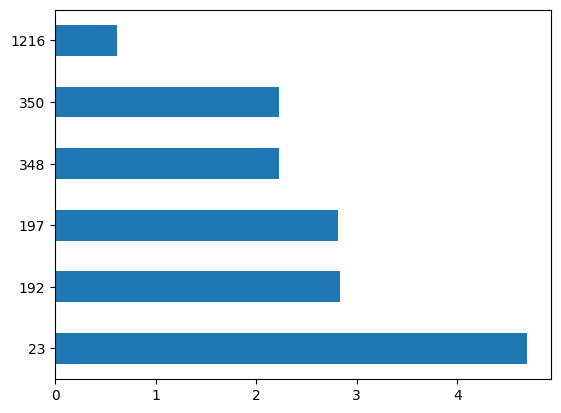

In [22]:
sec_sys_genes2["log2FoldChange"].plot(kind="barh")

In [23]:
sec_sys1 = kegg_ids[kegg_ids.ko.isin(secretion_system1)]
sec_sys_genes1 = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(sec_sys1.protein_id)].old_locus_tag)]

In [24]:
sec_sys_genes1

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y


In [25]:
sec_srp_kegg = kegg_ids[kegg_ids.ko.isin(sec_srp)]
sec_srp_genes = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(sec_srp_kegg.protein_id)].old_locus_tag)]

In [26]:
sec_srp_genes

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y
1059,AEP_RS05940,"206,7042374",0.889056,"0,129198986","6,881290111","5,93E-12",3.400000e-11,357,AEP_01186,WP_087494535.1,AEP_01186
1111,AEP_RS07880,"115,2740096",0.804777,"0,185318087","4,342676806","1,41E-05",4.050000e-05,1194,AEP_01576,WP_087494873.1,AEP_01576
1368,AEP_RS14030,"428,5389015",-0.584919,"0,156314339","-3,741938501","0,000182606",4.446110e-04,1878,AEP_02819,WP_087495959.1,AEP_02819
1410,AEP_RS14690,"3930,307564",-0.667963,"0,136043334","-4,909929552","9,11E-07",3.080000e-06,1308,AEP_02950,WP_087496072.1,AEP_02950
1521,AEP_RS10270,"612,9178146",-0.798481,"0,200383655","-3,984761177","6,75E-05",1.773740e-04,381,AEP_02057,WP_087495291.1,AEP_02057
1611,AEP_RS13240,"467,4762717",-0.911762,"0,182718876","-4,989973936","6,04E-07",2.080000e-06,1695,AEP_02658,WP_087495814.1,AEP_02658
1972,AEP_RS17215,"2092,50425",-1.366068,"0,191048552","-7,150370395","8,65E-13",5.450000e-12,2751,AEP_03447,WP_087497403.1,AEP_03447
2073,AEP_RS14025,"124,6127784",-1.550089,"0,317199988","-4,886787104","1,02E-06",3.450000e-06,327,AEP_02818,WP_087495958.1,AEP_02818
2095,AEP_RS14035,"306,0357757",-1.594958,"0,191628874","-8,323158586","8,56E-17",7.760000e-16,951,AEP_02820,WP_087495960.1,AEP_02820
2363,AEP_RS17690,"123,1502169",-2.762955,"0,351846741","-7,852721815","4,07E-15",3.170000e-14,453,AEP_03541,WP_087496616.1,AEP_03541


In [27]:
tat_1 = kegg_ids[kegg_ids.ko.isin(tat)]
tat_genes = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(tat_1.protein_id)].old_locus_tag)]

In [28]:
table_dict = {"Secretion System I":sec_sys_genes1, "Secretion System II":sec_sys_genes2, "SEC-SRP":sec_srp_genes,"TAT":tat_genes}

In [31]:
tpm_table = pd.read_csv("../results/processed_data/tpm_table_mouth_opening.csv", index_col=0)
new_cols = []
for col in tpm_table.columns:
    if "Hydra" in col:
        new_cols.append("hydra")
    elif "Liquid" in col:
        new_cols.append("liquid")
    else:
        new_cols.append("locus_tag")
tpm_table.columns = new_cols
tpm_table.head()

,locus_tag,hydra,hydra,hydra,hydra,hydra,liquid,liquid,liquid,liquid,liquid
0,AEP_RS00005,80.608281,127.842504,210.137751,157.380023,155.341909,455.559664,385.898737,375.501895,465.120825,542.039595
1,AEP_RS00010,63.048875,32.497976,78.893822,71.396230,53.461236,16.218102,12.558661,12.694622,21.887193,25.508822
2,AEP_RS00015,343.043195,223.451990,281.059242,267.903721,217.213886,294.269542,344.703134,655.087544,385.180625,408.568755
3,AEP_RS00020,32.670780,58.291823,17.033893,76.543920,56.664492,12.597080,11.462373,14.401806,17.277047,24.702018
4,AEP_RS00025,199.423955,59.302664,103.975674,97.339089,38.431409,82.539157,71.941725,73.950719,130.974387,179.053936


<Figure size 1000x800 with 0 Axes>

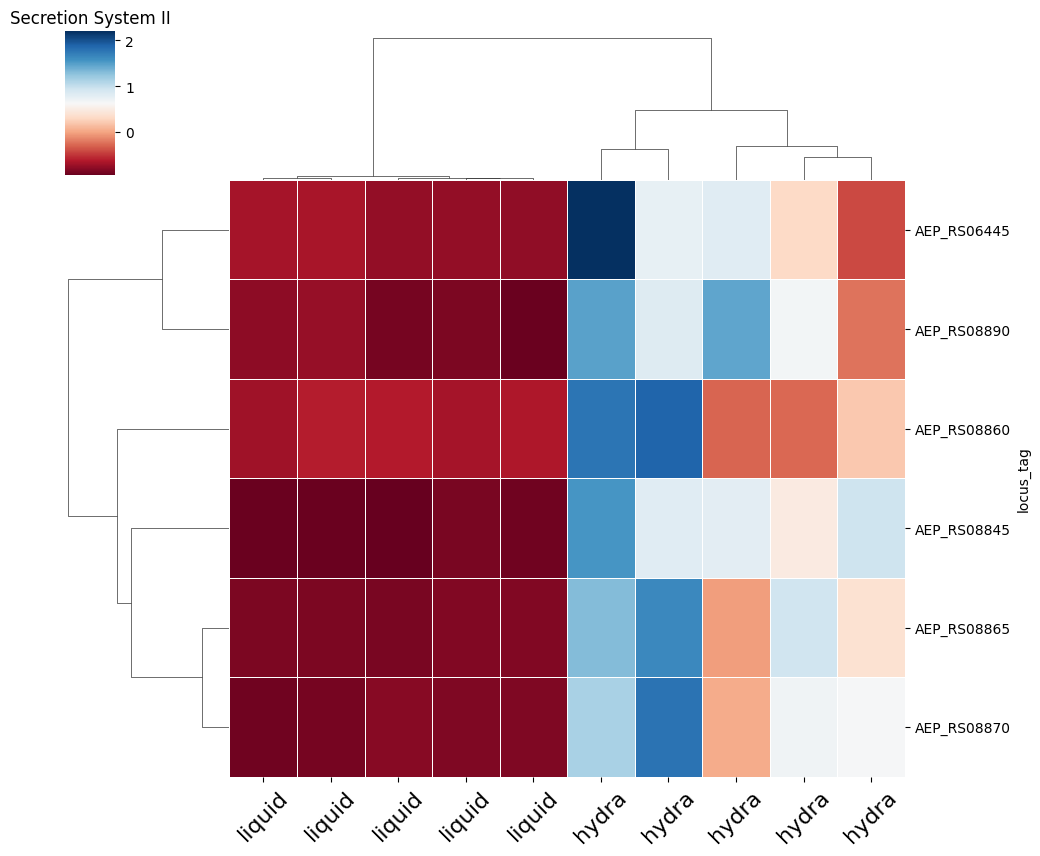

<Figure size 1000x800 with 0 Axes>

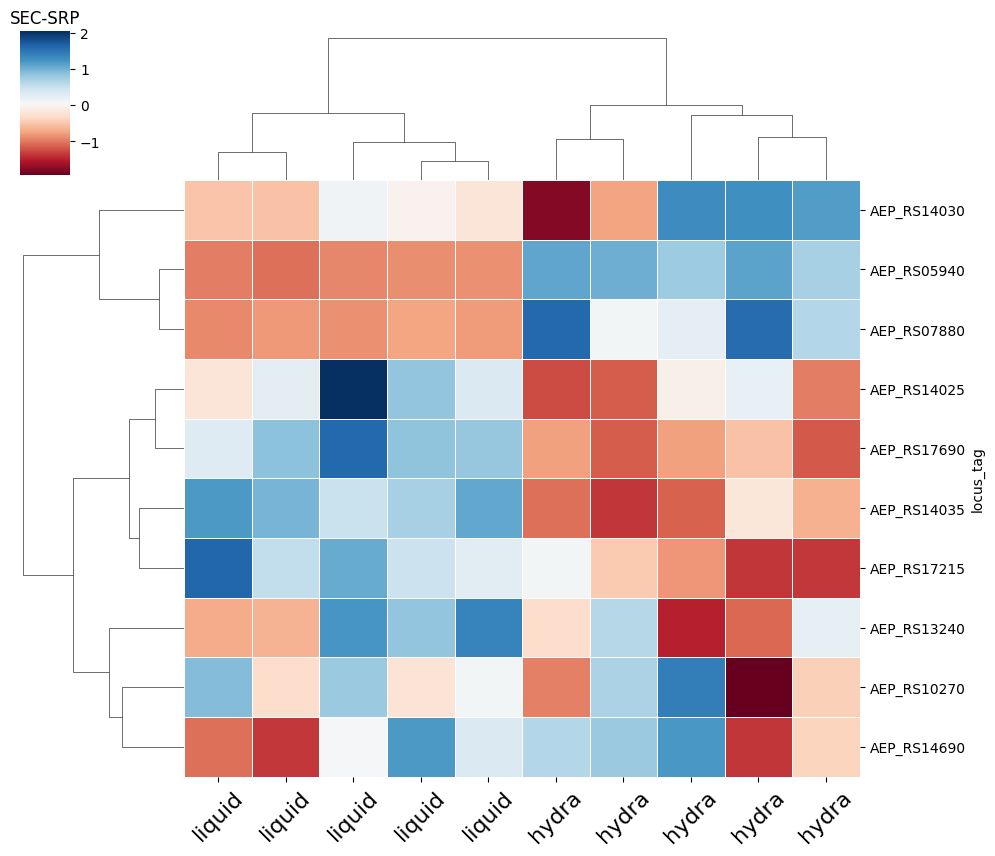

<Figure size 1000x800 with 0 Axes>

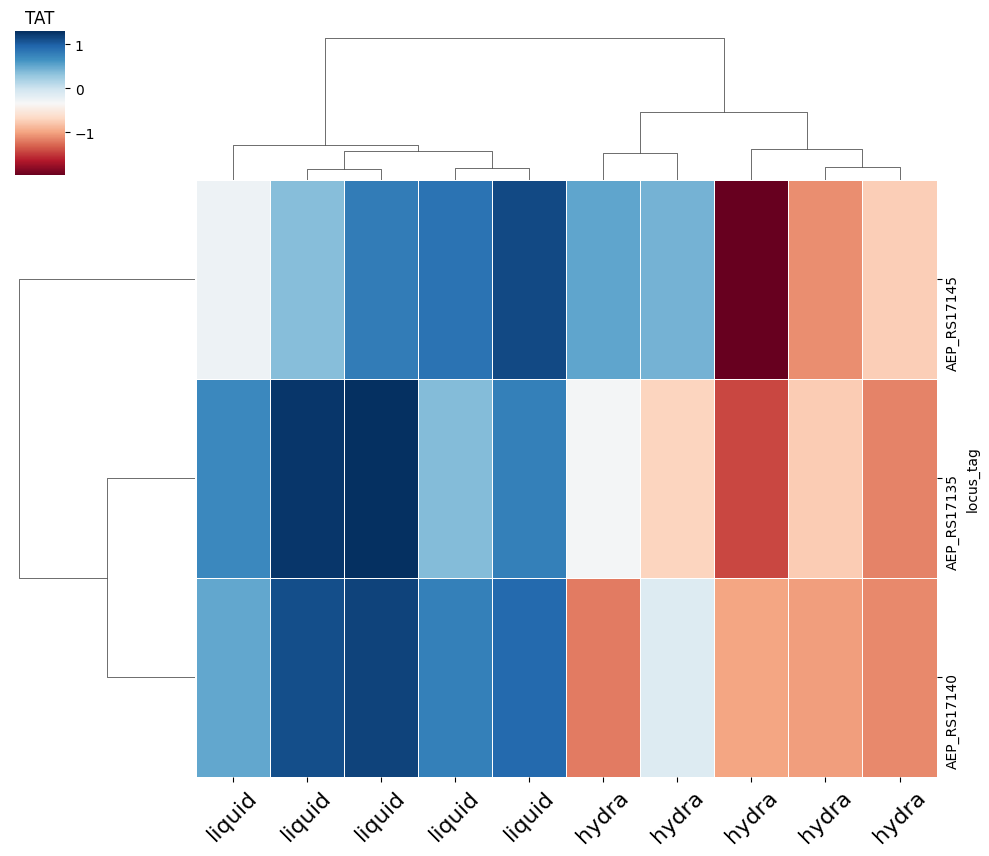

In [32]:
secretion_system_tables = {}
for sec_sys in table_dict.keys():
    
    temp_table = tpm_table[tpm_table.locus_tag.isin(table_dict[sec_sys].locus_tag)]
    temp_table.index = temp_table["locus_tag"]
    temp_table = temp_table.iloc[:,1:]

    if len(temp_table) > 0:
        secretion_system_tables[sec_sys] = temp_table
        # Set figure size
        plt.figure(figsize=(10, 8))
        
        # Create clustermap
        g = sns.clustermap(
            temp_table, 
            cmap="RdBu",        # Color map (can be changed, e.g., "coolwarm", "magma", "RdBu_r")
            method="ward",         # Clustering method (alternatives: "average", "single", "complete")
            metric="euclidean",    # Distance metric (alternatives: "correlation", "cosine")
            figsize=(10, 8),       # Figure size
            z_score=0,             # Standardize rows (0 for genes, 1 for samples, None for no scaling)
            linewidths=0.5,        # Add space between heatmap cells
            xticklabels=True,      # Show sample names
            yticklabels=True,       # Show gene names
        )
        
        g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize=16, rotation=45)  # Rotate if needed
        
        # Adjust yticklabel fontsize
        g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize=10)
        
        plt.title("{}".format(sec_sys))
        plot_name = sec_sys.lower().replace(" ", "_")
        plt.savefig("../results/figures/transcriptomics/{}_heatmap_tpm_vals.svg".format(plot_name))

In [33]:
secretion_system_tables.keys()

dict_keys(['Secretion System II', 'SEC-SRP', 'TAT'])

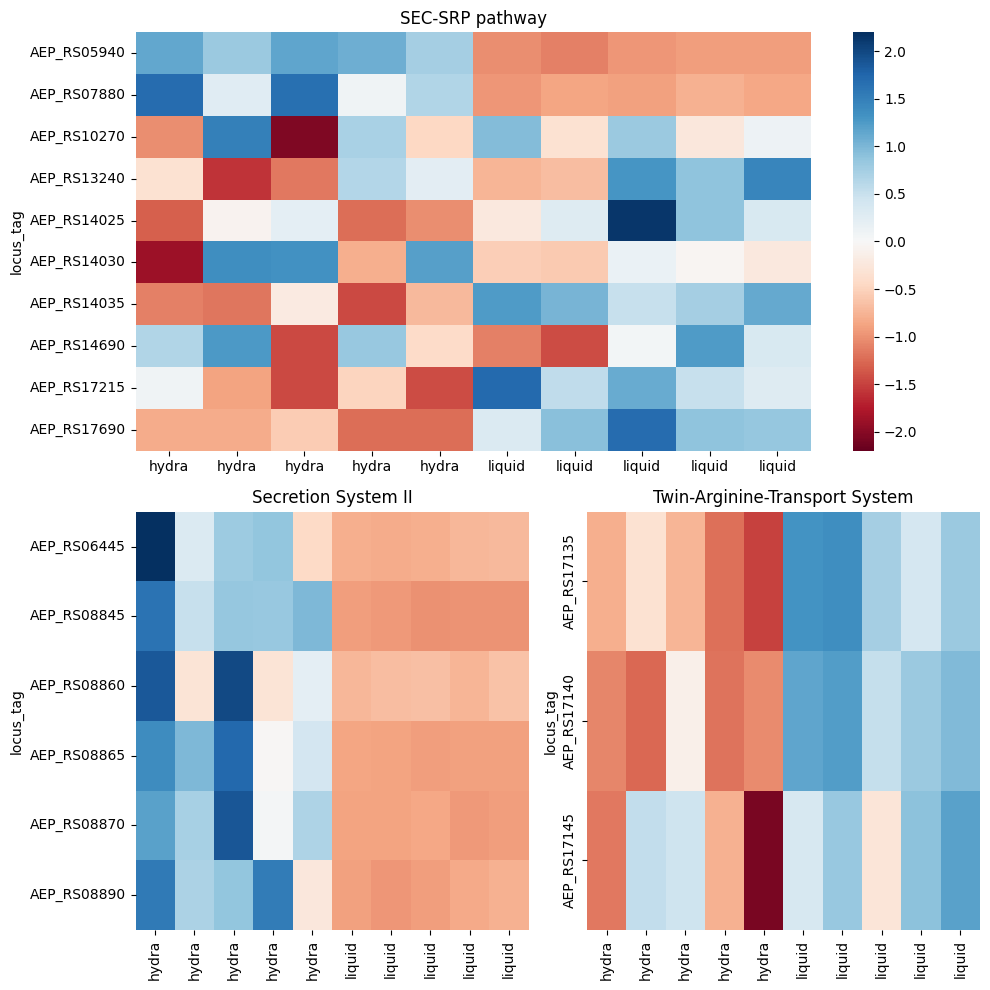

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.gridspec as gridspec
from scipy.stats import zscore

# Generate some sample data
data1 = secretion_system_tables["SEC-SRP"]
data1  = zscore(data1, axis=1)
data2 = secretion_system_tables["Secretion System II"]
data2  = zscore(data2, axis=1)

data3 = secretion_system_tables["TAT"]
data3  = zscore(data3, axis=1)


# Create the figure and specify the grid layout
fig = plt.figure(figsize=(10, 10))
gs = gridspec.GridSpec(2, 2, height_ratios=[1, 1])  # 2 rows, 2 cols

# First heatmap - spans across both columns in row 1
ax1 = plt.subplot(gs[0, :])  # Take the full first row
sns.heatmap(data1, ax=ax1, cmap="RdBu", vmin=-2.2,vmax=2.2)
ax1.set_title("SEC-SRP pathway")

# Second heatmap - bottom-left
ax2 = plt.subplot(gs[1, 0])  
sns.heatmap(data2, ax=ax2, cmap="RdBu",vmin=-2.2,vmax=2.2, cbar=False)
ax2.set_title("Secretion System II")

# Third heatmap - bottom-right
ax3 = plt.subplot(gs[1, 1])  
sns.heatmap(data3, ax=ax3, cmap="RdBu", vmin=-2.2,vmax=2.2, cbar=False)
ax3.set_title("Twin-Arginine-Transport System")

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig("../results/figures/transcriptomics/diff_regulated_secretion_systems.svg")


In [35]:
sulfur_uptake_kegg = kegg_ids[kegg_ids.ko.isin(sulfur_uptake)]
sulfur_genes = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(sulfur_uptake_kegg.protein_id)].old_locus_tag)]

In [36]:
sulfur_genes

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y
2066,AEP_RS12335,"148,8503948",-1.529021,"0,294928946","-5,184372133","2,17E-07",7.910000e-07,999,AEP_02475,WP_087495651.1,AEP_02475


In [37]:
meth_kegg = kegg_ids[kegg_ids.ko.isin(methionine_synthesis_kegg_ids)]
methionine_genes = deseq_table_bowtie[deseq_table_bowtie.gene_id.isin(translation_table[translation_table.protein_id.isin(meth_kegg.protein_id)].old_locus_tag)]

In [38]:
methionine_genes

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y
400,AEP_RS13550,"24,61929518",2.067853,"0,286433341","7,2193155","5,22E-13",3.380000e-12,1395,AEP_02721,WP_087495870.1,AEP_02721
450,AEP_RS06560,"59,80971687",1.939644,"0,256643438","7,557739401","4,10E-14",2.980000e-13,1026,AEP_01312,WP_087494645.1,AEP_01312
1201,AEP_RS19280,"354,0979421",0.645850,"0,167305675","3,860299463","0,000113248",2.866910e-04,1128,AEP_03865,WP_087496890.1,AEP_03865
1594,AEP_RS03905,"83,37886652",-0.893432,"0,228780196","-3,905198651","9,41E-05",2.415360e-04,1320,AEP_00773,WP_087494180.1,AEP_00773
1750,AEP_RS00840,"264,3707751",-1.086001,"0,167222509","-6,494346428","8,34E-11",4.360000e-10,1419,AEP_00165,WP_087493643.1,AEP_00165
1795,AEP_RS09260,"162,5613231",-1.127941,"0,25358328","-4,448008648","8,67E-06",2.550000e-05,849,AEP_01857,WP_087497263.1,AEP_01857
1843,AEP_RS11870,"516,4812462",-1.188848,"0,222411329","-5,345267122","9,03E-08",3.450000e-07,1074,AEP_02380,WP_087497305.1,AEP_02380
2255,AEP_RS11855,"632,6028642",-2.059814,"0,165073758","-12,47814452","9,82E-36",2.760000e-34,2709,AEP_02377,WP_087495570.1,AEP_02377


In [39]:
gene_to_description = {
    "AEP_02377":"MetH\nB12-binding/synthase domain",
    "AEP_02380":"MetH\nmethyltransferase domain",
    "AEP_01857":"MetF\n5,10-methylenetetrahydrofolate reductase",
    "AEP_02675":"MetX\nHomoserine O-acetyltransferase",
    "AEP_00165":"LysC\nAspartate kinase",
    "AEP_03865":"Asd\nAspartate-semialdehyde dehydrogenase",
    "AEP_02721":"Hom\nHomoserine dehydrogenase"
}

KeyError: 'AEP_01312'

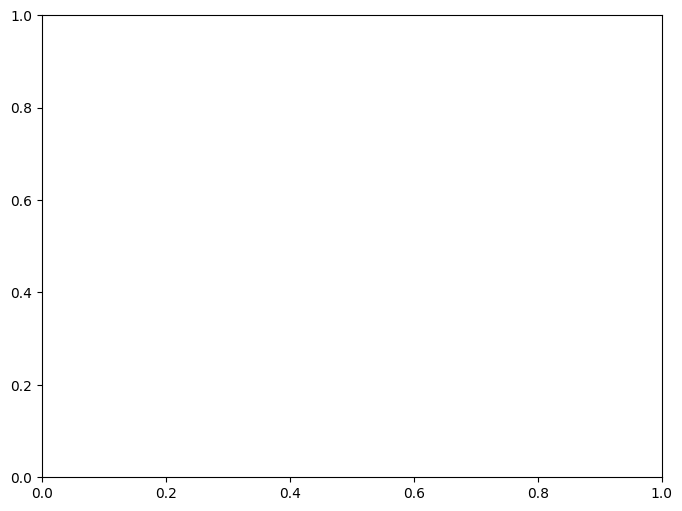

In [40]:
fig, ax = plt.subplots(figsize=(8,6))

yticklabels = [gene+": "+gene_to_description[gene] for gene in methionine_genes.gene_id]
bar_width = methionine_genes.log2FoldChange

colors = []
for log2 in methionine_genes.log2FoldChange:
    if log2 < 0:
        colors.append("grey")
    else:
        colors.append("white")

bars = ax.barh(yticklabels, bar_width, color=colors, edgecolor="black", label="significant genes", lw=2)
ax.set_yticklabels(yticklabels, fontsize=16)

#sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('adjusted p-values', labelpad=15, loc='center')
ax.set_xlabel('log2FoldChange', fontsize=16, labelpad=20)
ax.tick_params(axis='x', labelsize=14)
#ax.set_title(, fontsize=15, pad=20)

#plt.xlim(-3.5, 3.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis="x")

legend_handles = [Patch(facecolor="white", edgecolor="black", label='upregulated'),
          Patch(facecolor="grey", edgecolor="black", label='downregulated')]
ax.legend(handles=legend_handles, fontsize=14)

plt.tight_layout()
plt.savefig("../results/figures/methionine_synthesis_genes.svg")

In [48]:
genes_for_diff_exp = {"WP_087495570.1":"Methionine synthase MetH","WP_087497305.1":"S-methyltransferase domain (MetH)",
                     "WP_087494038.1":"Cobalamin transporter BtuB","WP_087494036.1":"Cobalamin binding protein"}

In [49]:
meth_b12 = deseq_table_bowtie[deseq_table_bowtie.protein_id.isin(genes_for_diff_exp.keys())]

In [50]:
meth_b12

,locus_tag,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,Length_bp,gene_id,protein_id,old_locus_tag_y
1808,AEP_RS03095,"53,74810526",-1.138579,"0,303251259","-3,754574204","0,000173636",4.245740e-04,849,AEP_00616,WP_087494036.1,AEP_00616
1843,AEP_RS11870,"516,4812462",-1.188848,"0,222411329","-5,345267122","9,03E-08",3.450000e-07,1074,AEP_02380,WP_087497305.1,AEP_02380
2255,AEP_RS11855,"632,6028642",-2.059814,"0,165073758","-12,47814452","9,82E-36",2.760000e-34,2709,AEP_02377,WP_087495570.1,AEP_02377
2356,AEP_RS03105,"755,3113127",-2.651723,"0,253352907","-10,46652049","1,23E-25",2.030000e-24,1845,AEP_00618,WP_087494038.1,AEP_00618


/tmp/ipykernel_47/641926731.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels, fontsize=16)


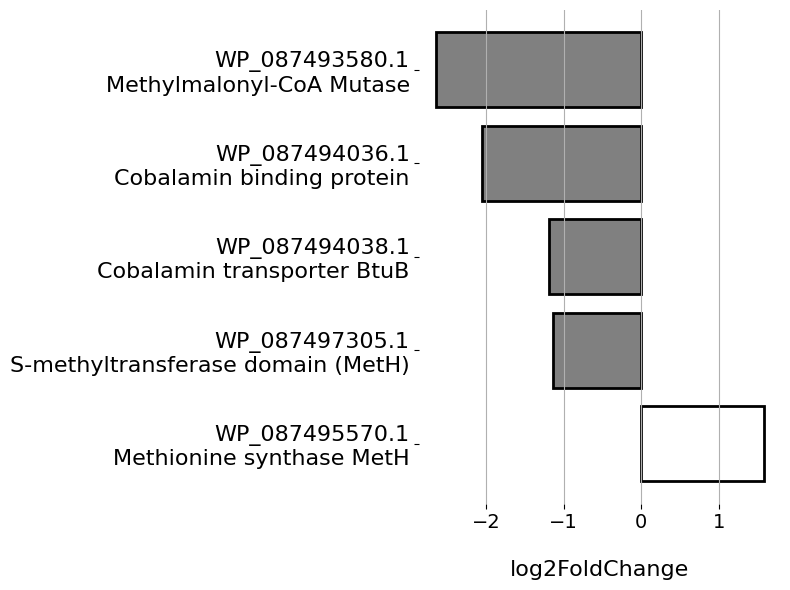

In [46]:
fig, ax = plt.subplots(figsize=(8,6))

yticklabels = [gene+"\n"+genes_for_diff_exp[gene] for gene in genes_for_diff_exp.keys()]
bar_width = meth_b12.log2FoldChange

colors = []
for log2 in meth_b12.log2FoldChange:
    if log2 < 0:
        colors.append("grey")
    else:
        colors.append("white")

bars = ax.barh(yticklabels, bar_width, color=colors, edgecolor="black", label="significant genes", lw=2)
ax.set_yticklabels(yticklabels, fontsize=16)

#sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
#sm.set_array([])
#cbar = plt.colorbar(sm)
#cbar.set_label('adjusted p-values', labelpad=15, loc='center')
ax.set_xlabel('log2FoldChange', fontsize=16, labelpad=20)
ax.tick_params(axis='x', labelsize=14)
#ax.set_title(, fontsize=15, pad=20)

#plt.xlim(-3.5, 3.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.grid(axis="x")

legend_handles = [Patch(facecolor="white", edgecolor="black", label='upregulated'),
          Patch(facecolor="grey", edgecolor="black", label='downregulated')]
#ax.legend(handles=legend_handles, fontsize=14)

plt.tight_layout()
plt.savefig("../results/figures/methionine_b12_transcriptomics.svg")